In [3]:
import pandas as pd
import For_Double_Model_Creation as fdm
import Dashboard as db
from sklearn.externals import joblib

c:\users\ashwi\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [5]:
Data = pd.read_csv('2018-2020 Sales,COVID,Demogrphics,Types.csv')

In [6]:
Data['Bill Date'] = pd.to_datetime(Data['Bill Date'], dayfirst=True)

%%time
state = 'California'
df = Data[Data['State'] == state]
x,y = fdm.create_pars_for_model(df, predict='Predict_Orders')
model_R_Res,model_B_Res,model_S_Res,model_G_Res, model_NE_Res,model_SAH, model_EM, model_FM, model_Q_Res = fdm.create_models_for_orders(x,y)
joblib.dump(model_R_Res, f'.\DataModels\State\Predict Orders\{state}\model_R_Res.joblib')

### Statewise

%%time
for state in Data['State'].unique():
    df = Data[Data['State'] == state]
    x,y = fdm.create_pars_for_model(df, predict='Predict_Orders')
    xSales, ySales = fdm.create_pars_for_model(df, predict='Predict_Sales')
    xNat, yNat = fdm.create_pars_for_model(Data, model_type='Natural History', predict='Predict_Sales')
    model_R_Res,model_B_Res,model_S_Res,model_G_Res, model_NE_Res,model_SAH, model_EM, model_FM, model_Q_Res = fdm.create_models_for_orders(x,y)
    PanSales = fdm.model_creation(xSales, ySales,4)
    History_Sales = fdm.model_creation(xNat,yNat,5)
    joblib.dump(model_R_Res, f'.\DataModels\State\Predict Orders\{state}\model_R_Res.joblib')


    # In[16]:


    joblib.dump(model_B_Res, f'.\DataModels\State\Predict Orders\{state}\model_B_Res.joblib')


    # In[17]:


    joblib.dump(model_S_Res, f'.\DataModels\State\Predict Orders\{state}\model_S_Res.joblib')


    # In[18]:


    joblib.dump(model_G_Res, f'.\DataModels\State\Predict Orders\{state}\model_G_Res.joblib')


    # In[19]:


    joblib.dump(model_NE_Res, f'.\DataModels\State\Predict Orders\{state}\model_NE_Res.joblib')


    # In[20]:


    joblib.dump(model_SAH, f'.\DataModels\State\Predict Orders\{state}\model_SAH.joblib')


    # In[21]:


    joblib.dump(model_EM, f'.\DataModels\State\Predict Orders\{state}\model_EM.joblib')


    # In[22]:


    joblib.dump(model_FM, f'.\DataModels\State\Predict Orders\{state}\model_FM.joblib')


    # In[23]:


    joblib.dump(model_Q_Res, f'.\DataModels\State\Predict Orders\{state}\model_Q_Res.joblib')


    # In[24]:


    joblib.dump(PanSales, f'.\DataModels\State\Predict Sales\{state}\PanSales.joblib')


    # In[29]:


    joblib.dump(History_Sales,f'.\DataModels\State\Predict Sales\{state}\History_Sales.joblib')

### By Brand

In [5]:
Data.columns

Index(['Unnamed: 0', 'Sub Brand', 'Bill Date', 'Qty', 'Brand', 'State',
       'County', 'R_Res', 'B_Res', 'S_Res', 'G_Res', 'NE_Res', 'SAH', 'EM',
       'FM', 'Q_Res', 'Covid cases', 'Zip Eliminated', 'age_median',
       'family_size', 'income_household_median', 'education_college_or_above',
       'labor_force_participation', 'unemployment_rate', 'race_white',
       'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'race_multiple', 'Year', 'Series ', 'Brand.1', 'CCG ', 'LDW'],
      dtype='object')

In [4]:
state = 'Montana'
df = Data[Data['State'] == state]

In [7]:
Brandwise = Data.groupby(['Brand','County','Bill Date']).agg({'Qty':'sum','Covid cases':'first','R_Res':'first','B_Res':'first', 'S_Res':'first', 
                                                     'G_Res':'first', 'NE_Res':'first', 'SAH':'first', 'EM':'first','FM':'first', 'Q_Res':'first',
                                                    'age_median':'first','family_size':'first', 'income_household_median':'first', 
                                                     'education_college_or_above':'first','labor_force_participation':'first','Year':'first'})

In [8]:
Brandwise = Brandwise.reset_index()
Brandwise

,Brand,County,Bill Date,Qty,Covid cases,R_Res,B_Res,S_Res,G_Res,NE_Res,SAH,EM,FM,Q_Res,age_median,family_size,income_household_median,education_college_or_above,labor_force_participation,Year
0,LENOVO-CHROME,Adair,2018-11-16,1,0,N,N,N,N,N,N,N,N,N,40.4,3.13,40300.0,16.8,54.6,2018
1,LENOVO-CHROME,Adams,2018-09-25,1,0,N,N,N,N,N,N,N,N,N,36.6,3.00,48552.0,25.1,65.5,2018
2,LENOVO-CHROME,Alachua,2018-09-22,1,0,N,N,N,N,N,N,N,N,N,28.6,3.31,42424.0,54.8,62.1,2018
3,LENOVO-CHROME,Alachua,2018-09-24,1,0,N,N,N,N,N,N,N,N,N,28.6,3.31,42424.0,54.8,62.1,2018
4,LENOVO-CHROME,Alachua,2018-12-20,1,0,N,N,N,N,N,N,N,N,N,39.9,3.26,69102.0,55.3,66.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160308,THINK-CHROME,Westchester,2018-03-22,1,0,N,N,N,N,N,N,N,N,N,44.9,3.13,144414.0,73.6,69.6,2018
160309,THINK-CHROME,Westchester,2018-07-20,1,0,N,N,N,N,N,N,N,N,N,43.6,3.31,201232.0,78.8,64.1,2018
160310,THINK-CHROME,Westchester,2018-09-11,1,0,N,N,N,N,N,N,N,N,N,44.8,3.27,126907.0,50.5,68.9,2018
160311,THINK-CHROME,Westchester,2018-11-25,1,0,N,N,N,N,N,N,N,N,N,41.0,3.78,71477.0,31.0,68.0,2018


In [9]:
Brandwise['Brand'].unique()

array(['LENOVO-CHROME', 'PCG LENOVO DESKTOP', 'PCG LENOVO NOTEBOOK',
       'PCG THINK DESKTOP', 'PCG THINK NOTEBOOK', 'PCG WORKSTATION',
       'PCG WORKSTATION-NOTEBOOK', 'THINK-CHROME'], dtype=object)

In [22]:
Thinkpad = Brandwise[Brandwise['Brand'] == 'PCG THINK NOTEBOOK']

In [23]:
x,y = fdm.create_pars_for_model(Thinkpad)

In [41]:
Thinkmodel = fdm.model_creation(x,y,15) #sales

In [25]:
from sklearn.externals import joblib

In [5]:
%%time
rows = fdm.iterring_rows(df,'Orders_Pan')

Wall time: 540 ms


In [6]:
%%time
df = fdm.update_predictions(df,rows,'Orders_Pan')

Wall time: 2.85 s


In [7]:
rows = fdm.iterring_rows(df,'Sales_Pan')

In [8]:
df = fdm.update_predictions(df,rows,'Sales_Pan')

salelist = []
for row in rows:
    sale = Thinkmodel.predict([row])
    salelist.append(sale[0])
Thinkpad['Sales Pan'] = salelist

In [9]:
df['Actual Vs COVID Sales'] = df['Qty'] - df['Sales Pan']
Acc = df['Actual Vs COVID Sales'].to_list()
q = [ele for ele in Acc if ele ==0]
len(q)/len(Acc)

0.8269966254218223

In [10]:
Think = df.groupby('Brand').sum().reset_index()
Brands = Think[['Brand','Qty','Sales Pan','Actual Vs COVID Sales']]
Brands['Acc'] = Brands['Sales Pan'] / Brands['Qty']
Brands

,Brand,Qty,Sales Pan,Actual Vs COVID Sales,Acc
0,LENOVO-CHROME,195,98,97,0.502564
1,PCG LENOVO DESKTOP,170,146,24,0.858824
2,PCG LENOVO NOTEBOOK,1597,1315,282,0.823419
3,PCG THINK DESKTOP,2511,403,2108,0.160494
4,PCG THINK NOTEBOOK,3677,2143,1534,0.582812
5,PCG WORKSTATION,374,113,261,0.302139
6,PCG WORKSTATION-NOTEBOOK,279,225,54,0.806452
7,THINK-CHROME,2,2,0,1.000000


In [20]:
# Brands using individual model

,Brand,Qty,Sales Pan,Actual Vs COVID Sales,Acc
0,LENOVO-CHROME,195,114,81,0.584615
1,PCG LENOVO DESKTOP,170,154,16,0.905882
2,PCG LENOVO NOTEBOOK,1597,1567,30,0.981215
3,PCG THINK DESKTOP,2511,427,2084,0.170052
4,PCG THINK NOTEBOOK,3677,2435,1242,0.662225
5,PCG WORKSTATION,374,113,261,0.302139
6,PCG WORKSTATION-NOTEBOOK,279,233,46,0.835125
7,THINK-CHROME,2,2,0,1.000000


In [11]:
#Individual model
df['Actual Vs COVID Sales'] = df['Qty'] - df['Sales Pan']
Acc = df['Actual Vs COVID Sales'].to_list()
q = [ele for ele in Acc if ele ==0]
len(q)/len(Acc)

0.8328458942632171

In [13]:
df['Brand'].unique()

array(['PCG THINK NOTEBOOK', 'PCG LENOVO NOTEBOOK', 'PCG THINK DESKTOP',
       'LENOVO-CHROME', 'PCG LENOVO DESKTOP', 'PCG WORKSTATION',
       'PCG WORKSTATION-NOTEBOOK', 'THINK-CHROME'], dtype=object)

In [16]:
Think = df.groupby('Brand').sum().reset_index()

In [19]:
Brands = Think[['Brand','Qty','Sales Pan','Actual Vs COVID Sales']]
Brands['Acc'] = Brands['Sales Pan'] / Brands['Qty']

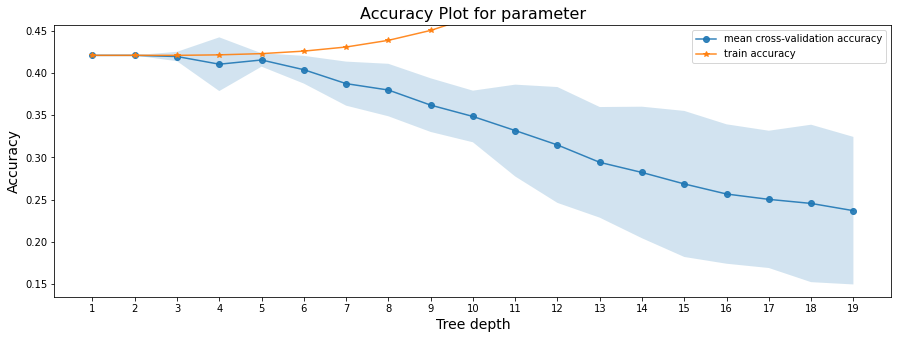

In [44]:
sm_tree_depths = range(1, 20)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = fdm.run_cross_validation_on_trees(x,
                                                                                        y, sm_tree_depths, 5)
fdm.plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 'Accuracy Plot for parameter')

In [21]:
df

,Unnamed: 0,Sub Brand,Bill Date,Qty,Brand,State,County,R_Res,B_Res,S_Res,...,race_pacific,race_other,race_multiple,Year,Series,Brand.1,CCG,LDW,Sales Pan,Actual Vs COVID Sales
178,178,X1C GEN5,2018-02-01,2,PCG THINK NOTEBOOK,Montana,Yellowstone,2,0,0,...,0.00,0.00,0.00,2018,TP X1 SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,1,1
399,399,FLEX 5-1470 R,2018-03-01,1,PCG LENOVO NOTEBOOK,Montana,Flathead,2,2,2,...,0.00,1.10,4.00,2018,IP FLEX SERIES,PCG LENOVO NOTEBOOK,Consumer,Laptop,1,0
495,495,T470,2018-03-01,1,PCG THINK NOTEBOOK,Montana,Madison,0,2,0,...,0.00,0.00,0.00,2018,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,1,0
1223,1223,M710S,2018-05-01,1,PCG THINK DESKTOP,Montana,Sanders,0,0,0,...,0.00,0.00,7.90,2018,TC M SERIES,PCG THINK DESKTOP,Commercial,Desktop,1,0
1276,1276,FLEX 11 CHROME,2018-05-01,1,LENOVO-CHROME,Montana,Silver Bow,2,2,2,...,0.00,0.50,1.40,2018,IP CHROME SERIES,LENOVO-CHROME,Consumer,Laptop,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771681,771681,M920S,2020-08-30,1,PCG THINK DESKTOP,Montana,Missoula,0,0,0,...,0.05,0.47,2.41,2020,TC M SERIES,PCG THINK DESKTOP,Commercial,Desktop,1,0
771741,771741,L340-17API,2020-08-30,1,PCG LENOVO NOTEBOOK,Montana,Gallatin,0,0,0,...,0.00,0.27,1.89,2020,IP G SERIES,PCG LENOVO NOTEBOOK,Consumer,Laptop,1,0
771878,771878,A540-24ICB,2020-08-30,1,PCG LENOVO DESKTOP,Montana,Missoula,0,0,0,...,0.20,0.50,4.20,2020,IC A SERIES,PCG LENOVO DESKTOP,Consumer,Desktop,1,0
772087,772087,X1 EXTREME G2,2020-08-31,1,PCG THINK NOTEBOOK,Montana,Gallatin,0,0,0,...,0.00,0.60,2.10,2020,TP X SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,1,0


In [11]:
Type = df.groupby('LDW').sum().reset_index()
Type = Type[['LDW','Qty','Sales Pan','Actual Vs COVID Sales']]
Type['Acc'] = Type['Sales Pan'] / Type['Qty']
Type

,LDW,Qty,Sales Pan,Actual Vs COVID Sales,Acc
0,Desktop,2681,549,2132,0.204774
1,Laptop,5469,3556,1913,0.650210
2,Workstation,653,338,315,0.517611


In [25]:
# using individual model
Type = df.groupby('LDW').sum().reset_index()
Type = Type[['LDW','Qty','Sales Pan','Actual Vs COVID Sales']]
Type['Acc'] = Type['Sales Pan'] / Type['Qty']
Type

,LDW,Qty,Sales Pan,Actual Vs COVID Sales,Acc
0,Desktop,2681,581,2100,0.216710
1,Laptop,5469,4116,1353,0.752606
2,Workstation,653,346,307,0.529862


In [12]:
CCG = df.groupby('CCG ').sum().reset_index()
CCG = CCG[['CCG ','Qty','Sales Pan','Actual Vs COVID Sales']]
CCG['Acc'] = CCG['Sales Pan'] / CCG['Qty']
CCG

,CCG,Qty,Sales Pan,Actual Vs COVID Sales,Acc
0,Commercial,6467,2771,3696,0.428483
1,Consumer,2094,1433,661,0.684336
2,Gaming,242,239,3,0.987603


In [27]:
#using individual model
CCG = df.groupby('CCG ').sum().reset_index()
CCG = CCG[['CCG ','Qty','Sales Pan','Actual Vs COVID Sales']]
CCG['Acc'] = CCG['Sales Pan'] / CCG['Qty']
CCG

,CCG,Qty,Sales Pan,Actual Vs COVID Sales,Acc
0,Commercial,6467,3095,3372,0.478584
1,Consumer,2094,1689,405,0.806590
2,Gaming,242,259,-17,1.070248


In [4]:
import pandas as pd
from datetime import datetime
from sklearn.externals import joblib

In [32]:
DataSet = pd.read_csv('2018-2020 Sales,COVID,Demogrphics,Types.csv')

In [33]:
Datalist = DataSet['Bill Date'].tolist()

In [34]:
Cleaned = []
for date in Datalist:
    if '/' in date:
        try:
            p = datetime.strptime(date,'%m/%d/%Y')
        except ValueError:
            try:
                p = datetime.strptime(date,'%d/%m/%Y')
            except ValueError:
                p = datetime.strptime(date,'%m/%d/%y')
    elif '-' in date:
        p = datetime.strptime(date,'%m-%d-%Y')
    Cleaned.append(p)

In [35]:
DataSet['Bill Date'] = Cleaned

In [36]:
DataSet.sort_values('Bill Date')

,Unnamed: 0,Sub Brand,Bill Date,Qty,Brand,State,County,Geographical Classification,R_Res,B_Res,...,race_asian,race_native,race_pacific,race_other,race_multiple,Year,Series,Brand.1,CCG,LDW
3998,3998,TP13,2018-01-02,12,PCG THINK NOTEBOOK,Florida,Pinellas,Urban,N,N,...,4.5,0.1,0.0,3.2,1.8,2018,TP 13 SERIES,PCG THINK NOTEBOOK,Commercial,Laptop
4000,4000,N23 CHROMEBOOK,2018-01-02,7,LENOVO-CHROME,California,Orange,Urban,N,N,...,9.3,1.1,0.0,12.8,3.6,2018,IP CHROME SERIES,LENOVO-CHROME,Consumer,Laptop
4001,4001,X270,2018-01-02,3,PCG THINK NOTEBOOK,New York,New York,Urban,N,N,...,21.2,0.0,0.0,0.5,2.0,2018,TP X SERIES,PCG THINK NOTEBOOK,Commercial,Laptop
4002,4002,11E,2018-01-02,15,PCG THINK NOTEBOOK,Florida,Pinellas,Urban,N,N,...,4.5,0.1,0.0,3.2,1.8,2018,TP E SERIES,PCG THINK NOTEBOOK,Commercial,Laptop
4003,4003,X1C GEN5,2018-01-02,2,PCG THINK NOTEBOOK,New York,New York,Urban,N,N,...,21.2,0.0,0.0,0.5,2.0,2018,TP X1 SERIES,PCG THINK NOTEBOOK,Commercial,Laptop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772118,772118,T590,2020-08-31,1,PCG THINK NOTEBOOK,Nebraska,Lancaster,Suburban,E,E,...,5.8,0.5,0.0,1.4,3.2,2020,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop
772119,772119,T590,2020-08-31,1,PCG THINK NOTEBOOK,Nebraska,Lancaster,Suburban,E,E,...,5.8,0.5,0.0,1.4,3.2,2020,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop
772120,772120,T590,2020-08-31,1,PCG THINK NOTEBOOK,Nebraska,Lancaster,Suburban,E,E,...,5.8,0.5,0.0,1.4,3.2,2020,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop
772113,772113,T590,2020-08-31,1,PCG THINK NOTEBOOK,Florida,Seminole,Urban,E,M,...,3.7,0.1,0.0,4.5,4.0,2020,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop


In [40]:
Months = []
for date in DataSet['Bill Date'].to_list():
    p = date.month
    Months.append(p)

In [41]:
DataSet['Months'] = Months

In [42]:
Years = []
for date in DataSet['Bill Date'].to_list():
    p = date.year
    Years.append(p)

In [43]:
DataSet['Year'] = Years

In [44]:
Year2018 = DataSet[DataSet['Year'] == 2018]

In [46]:
Monthwise = Year2018[Year2018['Months'] == 1]
Monthwise

,Unnamed: 0,Sub Brand,Bill Date,Qty,Brand,State,County,Geographical Classification,R_Res,B_Res,...,race_native,race_pacific,race_other,race_multiple,Year,Series,Brand.1,CCG,LDW,Months
3998,3998,TP13,2018-01-02,12,PCG THINK NOTEBOOK,Florida,Pinellas,Urban,N,N,...,0.1,0.0,3.2,1.8,2018,TP 13 SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,1
3999,3999,M710Q,2018-01-02,15,PCG THINK DESKTOP,New York,New York,Urban,N,N,...,0.0,0.0,0.5,2.0,2018,TC M SERIES,PCG THINK DESKTOP,Commercial,Desktop,1
4000,4000,N23 CHROMEBOOK,2018-01-02,7,LENOVO-CHROME,California,Orange,Urban,N,N,...,1.1,0.0,12.8,3.6,2018,IP CHROME SERIES,LENOVO-CHROME,Consumer,Laptop,1
4001,4001,X270,2018-01-02,3,PCG THINK NOTEBOOK,New York,New York,Urban,N,N,...,0.0,0.0,0.5,2.0,2018,TP X SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,1
4002,4002,11E,2018-01-02,15,PCG THINK NOTEBOOK,Florida,Pinellas,Urban,N,N,...,0.1,0.0,3.2,1.8,2018,TP E SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247925,247925,P51S,2018-01-31,18,PCG WORKSTATION-NOTEBOOK,California,Santa Clara,Urban,N,N,...,0.4,0.0,8.2,4.1,2018,TP P SERIES,PCG WORKSTATION-NOTEBOOK,Commercial,Workstation,1
247926,247926,T570,2018-01-31,1,PCG THINK NOTEBOOK,California,Los Angeles,Urban,N,N,...,0.4,0.0,4.3,10.7,2018,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,1
247927,247927,320S-14IKB,2018-01-31,1,PCG LENOVO NOTEBOOK,Florida,Miami-Dade,Urban,N,N,...,0.0,0.0,0.0,0.0,2018,IP S SERIES,PCG LENOVO NOTEBOOK,Consumer,Laptop,1
247928,247928,720S-14IKB,2018-01-31,1,PCG LENOVO NOTEBOOK,California,Riverside,Urban,N,N,...,0.2,0.0,8.9,5.7,2018,IP S SERIES,PCG LENOVO NOTEBOOK,Consumer,Laptop,1


In [47]:
DataSet

,Unnamed: 0,Sub Brand,Bill Date,Qty,Brand,State,County,Geographical Classification,R_Res,B_Res,...,race_native,race_pacific,race_other,race_multiple,Year,Series,Brand.1,CCG,LDW,Months
0,0,E470,2018-02-01,11,PCG THINK NOTEBOOK,New York,Kings,Urban,N,N,...,0.2,0.1,4.3,5.9,2018,TP E SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,2
1,1,YOGA 920-13IKB,2018-02-01,1,PCG LENOVO NOTEBOOK,California,Yolo,Urban,N,N,...,0.1,0.2,4.3,6.6,2018,IP YOGA SERIES,PCG LENOVO NOTEBOOK,Consumer,Laptop,2
2,2,T470S,2018-02-01,6,PCG THINK NOTEBOOK,California,San Mateo,Urban,N,N,...,0.6,1.1,8.0,8.0,2018,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,2
3,3,M810Z,2018-02-01,1,PCG THINK DESKTOP,California,Alameda,Urban,N,N,...,0.6,1.0,12.4,5.8,2018,TC M SERIES,PCG THINK DESKTOP,Commercial,Desktop,2
4,4,T480S,2018-02-01,1,PCG THINK NOTEBOOK,California,Marin,Urban,N,N,...,0.3,1.1,5.3,7.8,2018,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772529,772529,11E GEN5,2020-08-31,12,PCG THINK NOTEBOOK,New York,Kings,Urban,E,E,...,0.2,0.1,4.3,5.9,2020,TP E SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,8
772530,772530,E495,2020-08-31,93,PCG THINK NOTEBOOK,Florida,Miami-Dade,Urban,E,M,...,0.0,0.0,0.0,0.0,2020,TP E SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,8
772531,772531,E495,2020-08-31,90,PCG THINK NOTEBOOK,Florida,Miami-Dade,Urban,E,M,...,0.0,0.0,1.8,1.2,2020,TP E SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,8
772532,772532,E15,2020-08-31,83,PCG THINK NOTEBOOK,Florida,Miami-Dade,Urban,E,M,...,0.0,0.0,1.8,1.2,2020,TP E SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,8


In [48]:
DataSet.drop(columns = 'Unnamed: 0', inplace=True)

In [49]:
DataSet

,Sub Brand,Bill Date,Qty,Brand,State,County,Geographical Classification,R_Res,B_Res,S_Res,...,race_native,race_pacific,race_other,race_multiple,Year,Series,Brand.1,CCG,LDW,Months
0,E470,2018-02-01,11,PCG THINK NOTEBOOK,New York,Kings,Urban,N,N,N,...,0.2,0.1,4.3,5.9,2018,TP E SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,2
1,YOGA 920-13IKB,2018-02-01,1,PCG LENOVO NOTEBOOK,California,Yolo,Urban,N,N,N,...,0.1,0.2,4.3,6.6,2018,IP YOGA SERIES,PCG LENOVO NOTEBOOK,Consumer,Laptop,2
2,T470S,2018-02-01,6,PCG THINK NOTEBOOK,California,San Mateo,Urban,N,N,N,...,0.6,1.1,8.0,8.0,2018,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,2
3,M810Z,2018-02-01,1,PCG THINK DESKTOP,California,Alameda,Urban,N,N,N,...,0.6,1.0,12.4,5.8,2018,TC M SERIES,PCG THINK DESKTOP,Commercial,Desktop,2
4,T480S,2018-02-01,1,PCG THINK NOTEBOOK,California,Marin,Urban,N,N,N,...,0.3,1.1,5.3,7.8,2018,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772529,11E GEN5,2020-08-31,12,PCG THINK NOTEBOOK,New York,Kings,Urban,E,E,E,...,0.2,0.1,4.3,5.9,2020,TP E SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,8
772530,E495,2020-08-31,93,PCG THINK NOTEBOOK,Florida,Miami-Dade,Urban,E,M,M,...,0.0,0.0,0.0,0.0,2020,TP E SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,8
772531,E495,2020-08-31,90,PCG THINK NOTEBOOK,Florida,Miami-Dade,Urban,E,M,M,...,0.0,0.0,1.8,1.2,2020,TP E SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,8
772532,E15,2020-08-31,83,PCG THINK NOTEBOOK,Florida,Miami-Dade,Urban,E,M,M,...,0.0,0.0,1.8,1.2,2020,TP E SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,8


In [50]:
DataSet.to_csv('2018-2020 Sales,COVID,Demogrphics,Types.csv', index=False)

In [1]:
import pandas as pd
import For_Double_Model_Creation as fdm
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

c:\users\ashwi\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
df = pd.read_csv('2018-2020 Sales,COVID,Demogrphics,Types.csv')

In [3]:
df['Bill Date'] = pd.to_datetime(df['Bill Date'], dayfirst=True)

In [4]:
df.sort_values('Bill Date', inplace=True)

In [5]:
df

,Sub Brand,Bill Date,Qty,Brand,State,County,Geographical Classification,R_Res,B_Res,S_Res,...,race_native,race_pacific,race_other,race_multiple,Year,Series,Brand.1,CCG,LDW,Months
3998,TP13,2018-01-02,12,PCG THINK NOTEBOOK,Florida,Pinellas,Urban,N,N,N,...,0.1,0.0,3.2,1.8,2018,TP 13 SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,1
4000,N23 CHROMEBOOK,2018-01-02,7,LENOVO-CHROME,California,Orange,Urban,N,N,N,...,1.1,0.0,12.8,3.6,2018,IP CHROME SERIES,LENOVO-CHROME,Consumer,Laptop,1
4001,X270,2018-01-02,3,PCG THINK NOTEBOOK,New York,New York,Urban,N,N,N,...,0.0,0.0,0.5,2.0,2018,TP X SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,1
4002,11E,2018-01-02,15,PCG THINK NOTEBOOK,Florida,Pinellas,Urban,N,N,N,...,0.1,0.0,3.2,1.8,2018,TP E SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,1
4003,X1C GEN5,2018-01-02,2,PCG THINK NOTEBOOK,New York,New York,Urban,N,N,N,...,0.0,0.0,0.5,2.0,2018,TP X1 SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772118,T590,2020-08-31,1,PCG THINK NOTEBOOK,Nebraska,Lancaster,Suburban,E,E,E,...,0.5,0.0,1.4,3.2,2020,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,8
772119,T590,2020-08-31,1,PCG THINK NOTEBOOK,Nebraska,Lancaster,Suburban,E,E,E,...,0.5,0.0,1.4,3.2,2020,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,8
772120,T590,2020-08-31,1,PCG THINK NOTEBOOK,Nebraska,Lancaster,Suburban,E,E,E,...,0.5,0.0,1.4,3.2,2020,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,8
772113,T590,2020-08-31,1,PCG THINK NOTEBOOK,Florida,Seminole,Urban,E,M,M,...,0.1,0.0,4.5,4.0,2020,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,8


In [6]:
df['State'].unique()

array(['Florida', 'California', 'New York', 'Utah', 'Nebraska', 'Montana',
       'Kentucky', 'Hawaii'], dtype=object)

In [17]:
State = df[(df['State'] == 'New York') & (df['Year'] == 2020)]

In [8]:
State.columns

Index(['Sub Brand', 'Bill Date', 'Qty', 'Brand', 'State', 'County',
       'Geographical Classification', 'R_Res', 'B_Res', 'S_Res', 'G_Res',
       'NE_Res', 'SAH', 'EM', 'FM', 'Q_Res', 'Covid cases', 'Zip Eliminated',
       'age_median', 'family_size', 'income_household_median',
       'education_college_or_above', 'labor_force_participation',
       'unemployment_rate', 'race_white', 'race_black', 'race_asian',
       'race_native', 'race_pacific', 'race_other', 'race_multiple', 'Year',
       'Series ', 'Brand.1', 'CCG ', 'LDW', 'Months'],
      dtype='object')

In [18]:
%%time
State = fdm.update_predictions(State, 'Orders_Pan', 'New York')

Wall time: 22.3 s


In [13]:
State

,Bill Date,Qty,Covid cases,age_median,family_size,income_household_median,education_college_or_above,labor_force_participation,R_Res,B_Res,S_Res,G_Res,NE_Res,SAH,EM,FM,Q_Res
0,2020-01-01,18,0,37.750000,3.272500,72109.500000,44.275000,66.875000,2,2,2,2,1,1,1,1,1
1,2020-01-03,41,0,41.024615,3.100769,67150.598462,34.577692,62.769231,2,2,2,2,1,1,1,1,1
2,2020-01-04,434,0,39.933333,3.049167,78184.805556,39.208333,60.761111,2,2,2,2,1,1,1,1,1
3,2020-01-05,10,0,39.150000,2.975000,74896.833333,46.116667,63.816667,2,2,2,2,1,1,1,1,1
4,2020-01-06,58,0,41.700000,3.077143,79807.857143,42.192857,64.292857,2,2,2,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2020-08-27,729,424988,39.521212,3.126970,77844.181818,36.921212,62.430303,0,0,0,0,0,1,0,0,0
235,2020-08-28,245,356556,40.714815,3.080000,77160.740741,39.507407,62.011111,0,0,0,0,0,1,0,0,0
236,2020-08-29,495,426808,39.100000,3.198438,63073.781250,31.440625,61.400000,0,0,0,0,0,1,0,0,0
237,2020-08-30,665,419320,40.324000,3.086000,75497.680000,41.016000,62.752000,0,0,0,0,0,1,0,0,0


In [19]:
State = fdm.update_predictions(State, 'Sales_Pan', 'New York')

In [20]:
State

,Sub Brand,Bill Date,Qty,Brand,State,County,Geographical Classification,R_Res,B_Res,S_Res,...,race_pacific,race_other,race_multiple,Year,Series,Brand.1,CCG,LDW,Months,Sales Pan
558256,L490,2020-01-01,1,PCG THINK NOTEBOOK,New York,Albany,Suburban,2,2,2,...,0.00,0.6,6.9,2020,TP L SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,1,1
558257,L490,2020-01-01,2,PCG THINK NOTEBOOK,New York,Albany,Suburban,2,2,2,...,0.00,0.6,6.9,2020,TP L SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,1,1
558258,L490,2020-01-01,12,PCG THINK NOTEBOOK,New York,Albany,Suburban,2,2,2,...,0.03,6.1,3.0,2020,TP L SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,1,1
558230,T470S,2020-01-01,1,PCG THINK NOTEBOOK,New York,New York,Urban,2,2,2,...,0.00,4.2,1.4,2020,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,1,1
558228,T490S,2020-01-01,1,PCG THINK NOTEBOOK,New York,Queens,Urban,2,2,2,...,0.20,17.7,4.8,2020,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772108,T590,2020-08-31,1,PCG THINK NOTEBOOK,New York,New York,Urban,0,0,0,...,0.00,0.5,2.0,2020,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,8,1
772109,T590,2020-08-31,1,PCG THINK NOTEBOOK,New York,New York,Urban,0,0,0,...,0.00,0.5,2.0,2020,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,8,1
772110,T590,2020-08-31,1,PCG THINK NOTEBOOK,New York,Putnam,Urban,0,0,1,...,0.00,9.5,1.7,2020,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,8,1
772111,T590,2020-08-31,1,PCG THINK NOTEBOOK,New York,Rockland,Urban,0,0,1,...,0.00,13.6,1.4,2020,TP T SERIES,PCG THINK NOTEBOOK,Commercial,Laptop,8,1


In [25]:
State['Actual Vs COVID Sales'] = State['Qty'] - State['Sales Pan']

In [26]:
New = State.groupby('Bill Date').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()

In [28]:
New['Acc'] = New['Sales Pan'] / New['Qty']
New

,Bill Date,Qty,Sales Pan,Actual Vs COVID Sales,Acc
0,2020-01-01,18,6,12,0.333333
1,2020-01-03,41,24,17,0.585366
2,2020-01-04,434,364,70,0.838710
3,2020-01-05,10,7,3,0.700000
4,2020-01-06,58,42,16,0.724138
...,...,...,...,...,...
234,2020-08-27,729,286,443,0.392318
235,2020-08-28,245,182,63,0.742857
236,2020-08-29,495,213,282,0.430303
237,2020-08-30,665,107,558,0.160902


In [29]:
Overall_Accuracy = sum(New['Sales Pan'].to_list())/sum(New['Qty'].to_list())

In [30]:
Overall_Accuracy

0.3574681510975162

In [31]:
Actual = State['Actual Vs COVID Sales'].to_list()
q = [ele for ele in Actual if ele ==0]
len(q)/len(Actual)

0.8524511795778856

In [33]:
New = State.groupby('Brand').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()
New['Acc'] = New['Sales Pan'] / New['Qty']
Overall_Accuracy = sum(New['Sales Pan'].to_list())/sum(New['Qty'].to_list())

In [35]:
Overall_Accuracy

0.3574681510975162

In [40]:
%%time
state = 'Hawaii'
State = df[(df['State'] == state) & (df['Year'] == 2020)] 
State = fdm.update_predictions(State, 'Orders_Pan', state)
State = fdm.update_predictions(State, 'Sales_Pan', state)
State['Actual Vs COVID Sales'] = State['Qty'] - State['Sales Pan']
Date = State.groupby('Bill Date').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()
Date['Acc'] = Date['Sales Pan'] / Date['Qty']
Actual = State['Actual Vs COVID Sales'].to_list()
q = [ele for ele in Actual if ele ==0]
ACC = len(q)/len(Actual)
Brand = State.groupby('Brand').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()
Brand['Acc'] = Brand['Sales Pan'] / Brand['Qty']
Overall_Accuracy = sum(Brand['Sales Pan'].to_list())/sum(Brand['Qty'].to_list())
ACC, Overall_Accuracy

Wall time: 1.31 s


(0.8513951979234263, 0.42853170189099)

In [41]:
%%time
state = 'New York'
State = df[(df['State'] == state) & (df['Year'] == 2020)] 
State = fdm.update_predictions(State, 'Orders_Pan', state)
State = fdm.update_predictions(State, 'Sales_Pan', state)
State['Actual Vs COVID Sales'] = State['Qty'] - State['Sales Pan']
Date = State.groupby('Bill Date').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()
Date['Acc'] = Date['Sales Pan'] / Date['Qty']
Actual = State['Actual Vs COVID Sales'].to_list()
q = [ele for ele in Actual if ele ==0]
ACC = len(q)/len(Actual)
Brand = State.groupby('Brand').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()
Brand['Acc'] = Brand['Sales Pan'] / Brand['Qty']
Overall_Accuracy = sum(Brand['Sales Pan'].to_list())/sum(Brand['Qty'].to_list())
ACC, Overall_Accuracy

Wall time: 37.8 s


(0.8524511795778856, 0.3574681510975162)

In [42]:
%%time
state = 'Florida'
State = df[(df['State'] == state) & (df['Year'] == 2020)] 
State = fdm.update_predictions(State, 'Orders_Pan', state)
State = fdm.update_predictions(State, 'Sales_Pan', state)
State['Actual Vs COVID Sales'] = State['Qty'] - State['Sales Pan']
Date = State.groupby('Bill Date').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()
Date['Acc'] = Date['Sales Pan'] / Date['Qty']
Actual = State['Actual Vs COVID Sales'].to_list()
q = [ele for ele in Actual if ele ==0]
ACC = len(q)/len(Actual)
Brand = State.groupby('Brand').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()
Brand['Acc'] = Brand['Sales Pan'] / Brand['Qty']
Overall_Accuracy = sum(Brand['Sales Pan'].to_list())/sum(Brand['Qty'].to_list())
ACC, Overall_Accuracy

Wall time: 1min 25s


(0.5903230031074018, 0.05416648451254706)

In [43]:
%%time
state = 'Montana'
State = df[(df['State'] == state) & (df['Year'] == 2020)] 
State = fdm.update_predictions(State, 'Orders_Pan', state)
State = fdm.update_predictions(State, 'Sales_Pan', state)
State['Actual Vs COVID Sales'] = State['Qty'] - State['Sales Pan']
Date = State.groupby('Bill Date').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()
Date['Acc'] = Date['Sales Pan'] / Date['Qty']
Actual = State['Actual Vs COVID Sales'].to_list()
q = [ele for ele in Actual if ele ==0]
ACC = len(q)/len(Actual)
Brand = State.groupby('Brand').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()
Brand['Acc'] = Brand['Sales Pan'] / Brand['Qty']
Overall_Accuracy = sum(Brand['Sales Pan'].to_list())/sum(Brand['Qty'].to_list())
ACC, Overall_Accuracy

Wall time: 1.24 s


(0.8177810433504776, 0.6354936929099608)

In [44]:
%%time
state = 'Kentucky'
State = df[(df['State'] == state) & (df['Year'] == 2020)] 
State = fdm.update_predictions(State, 'Orders_Pan', state)
State = fdm.update_predictions(State, 'Sales_Pan', state)
State['Actual Vs COVID Sales'] = State['Qty'] - State['Sales Pan']
Date = State.groupby('Bill Date').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()
Date['Acc'] = Date['Sales Pan'] / Date['Qty']
Actual = State['Actual Vs COVID Sales'].to_list()
q = [ele for ele in Actual if ele ==0]
ACC = len(q)/len(Actual)
Brand = State.groupby('Brand').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()
Brand['Acc'] = Brand['Sales Pan'] / Brand['Qty']
Overall_Accuracy = sum(Brand['Sales Pan'].to_list())/sum(Brand['Qty'].to_list())
ACC, Overall_Accuracy

Wall time: 2.88 s


(0.8518195050946142, 0.35557615075687365)

In [45]:
%%time
state = 'Nebraska'
State = df[(df['State'] == state) & (df['Year'] == 2020)] 
State = fdm.update_predictions(State, 'Orders_Pan', state)
State = fdm.update_predictions(State, 'Sales_Pan', state)
State['Actual Vs COVID Sales'] = State['Qty'] - State['Sales Pan']
Date = State.groupby('Bill Date').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()
Date['Acc'] = Date['Sales Pan'] / Date['Qty']
Actual = State['Actual Vs COVID Sales'].to_list()
q = [ele for ele in Actual if ele ==0]
ACC = len(q)/len(Actual)
Brand = State.groupby('Brand').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()
Brand['Acc'] = Brand['Sales Pan'] / Brand['Qty']
Overall_Accuracy = sum(Brand['Sales Pan'].to_list())/sum(Brand['Qty'].to_list())
ACC, Overall_Accuracy

Wall time: 1.52 s


(0.8804990151017729, 0.6348478532721967)

In [46]:
%%time
state = 'Utah'
State = df[(df['State'] == state) & (df['Year'] == 2020)] 
State = fdm.update_predictions(State, 'Orders_Pan', state)
State = fdm.update_predictions(State, 'Sales_Pan', state)
State['Actual Vs COVID Sales'] = State['Qty'] - State['Sales Pan']
Date = State.groupby('Bill Date').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()
Date['Acc'] = Date['Sales Pan'] / Date['Qty']
Actual = State['Actual Vs COVID Sales'].to_list()
q = [ele for ele in Actual if ele ==0]
ACC = len(q)/len(Actual)
Brand = State.groupby('Brand').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()
Brand['Acc'] = Brand['Sales Pan'] / Brand['Qty']
Overall_Accuracy = sum(Brand['Sales Pan'].to_list())/sum(Brand['Qty'].to_list())
ACC, Overall_Accuracy

Wall time: 3.24 s


(0.8465937344604675, 0.5050859772341971)

In [1]:
import pandas as pd
import For_Double_Model_Creation as fdm

c:\users\ashwi\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
df = pd.read_csv('2018-2020 Sales,COVID,Demogrphics,Types.csv')

In [3]:
%%time
state = 'New York'
State = df[(df['State'] == state) & (df['Year'] == 2020)]
model = fdm.Alternate(State)

Wall time: 18.5 s


In [4]:
%%time
State = fdm.prediction(State,model)

Wall time: 9.55 s


In [6]:
State['Bill Date'] = pd.to_datetime(State['Bill Date'], dayfirst=True)

In [7]:
State['Actual Vs COVID Sales'] = State['Qty'] - State['Sales Pan']
Date = State.groupby('Bill Date').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()
Date['Acc'] = Date['Sales Pan'] / Date['Qty']
Actual = State['Actual Vs COVID Sales'].to_list()
q = [ele for ele in Actual if ele ==0]
ACC = len(q)/len(Actual)
Brand = State.groupby('Brand').agg({'Qty':'sum', 'Sales Pan': 'sum', 'Actual Vs COVID Sales':'sum' }).reset_index()
Brand['Acc'] = Brand['Sales Pan'] / Brand['Qty']
Overall_Accuracy = sum(Brand['Sales Pan'].to_list())/sum(Brand['Qty'].to_list())
ACC, Overall_Accuracy

(0.8524511795778856, 0.3574681510975162)

In [3]:
state = 'New York'
State = df[(df['State'] == state) & (df['Year'] == 2020)]

In [4]:
State.columns

Index(['Sub Brand', 'Bill Date', 'Qty', 'Brand', 'State', 'County',
       'Geographical Classification', 'R_Res', 'B_Res', 'S_Res', 'G_Res',
       'NE_Res', 'SAH', 'EM', 'FM', 'Q_Res', 'Covid cases', 'Zip Eliminated',
       'age_median', 'family_size', 'income_household_median',
       'education_college_or_above', 'labor_force_participation',
       'unemployment_rate', 'race_white', 'race_black', 'race_asian',
       'race_native', 'race_pacific', 'race_other', 'race_multiple', 'Year',
       'Series ', 'Brand.1', 'CCG ', 'LDW', 'Months'],
      dtype='object')

In [5]:
State['Bill Date'] = pd.to_datetime(State['Bill Date'], dayfirst=True)

In [15]:
Date = State.groupby(['County','Bill Date']).agg({'Qty':'sum','Covid cases':'first','age_median':'first', 
                                                   'family_size':'first', 'income_household_median':'first',
                                                   'education_college_or_above':'first', 'labor_force_participation':'first'})

In [16]:
Date = Date.reset_index()

In [8]:
model = fdm.Alternate(Date)

In [9]:
Date = fdm.prediction(Date,model)

In [10]:
Date

,County,Bill Date,Qty,Covid cases,age_median,family_size,income_household_median,education_college_or_above,labor_force_participation,Sales Pan
0,Albany,2020-01-01,15,0,30.6,2.86,45922.0,44.2,76.4,1
1,Albany,2020-01-03,7,0,47.9,3.04,91193.0,65.2,61.2,2
2,Albany,2020-01-04,16,0,32.7,3.04,29229.0,22.9,66.4,1
3,Albany,2020-01-05,1,0,41.6,3.07,69411.0,32.2,65.6,1
4,Albany,2020-01-06,2,0,41.6,3.07,69411.0,32.2,65.6,1
...,...,...,...,...,...,...,...,...,...,...
5751,Yates,2020-04-04,1,2,42.8,3.35,51875.0,22.9,58.7,1
5752,Yates,2020-05-19,1,26,43.1,3.20,0.0,7.5,97.2,1
5753,Yates,2020-06-13,1,39,49.5,4.07,38707.0,32.1,57.6,1
5754,Yates,2020-06-24,1,44,49.5,4.07,38707.0,32.1,57.6,1


In [11]:
Date['Actual Vs COVID Sales'] = Date['Qty'] - Date['Sales Pan']
Date['Acc'] = Date['Sales Pan'] / Date['Qty']
Actual = Date['Actual Vs COVID Sales'].to_list()
q = [ele for ele in Actual if ele ==0]
ACC = len(q)/len(Actual)
Overall_Accuracy = sum(Date['Sales Pan'].to_list())/sum(Date['Qty'].to_list())
ACC, Overall_Accuracy

(0.3801250868658791, 0.14900416107726616)

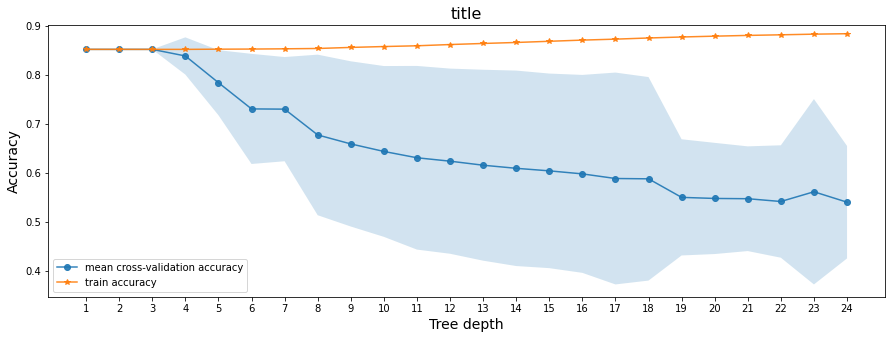

In [14]:
import numpy as _np
struct_data = State.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[_np.number]).columns)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in non_numeric_columns:
    if col in struct_data.columns:
        i = struct_data.columns.get_loc(col)
        struct_data.iloc[:, i] = struct_data.apply(lambda i: le.fit_transform(i.astype(str)), axis=0,
                                                   result_type='expand')
x = struct_data[
            ['Covid cases', 'age_median',
             'family_size', 'income_household_median', 'education_college_or_above',
             'labor_force_participation']]
y = struct_data['Qty']
tree_depths = range(1,25)
cv_scores_mean, cv_scores_std, accuracy_scores = fdm.run_cross_validation_on_trees(x, y, tree_depths, cv=5)
fdm.plot_cross_validation_on_trees(tree_depths, cv_scores_mean, cv_scores_std, accuracy_scores, 'title')

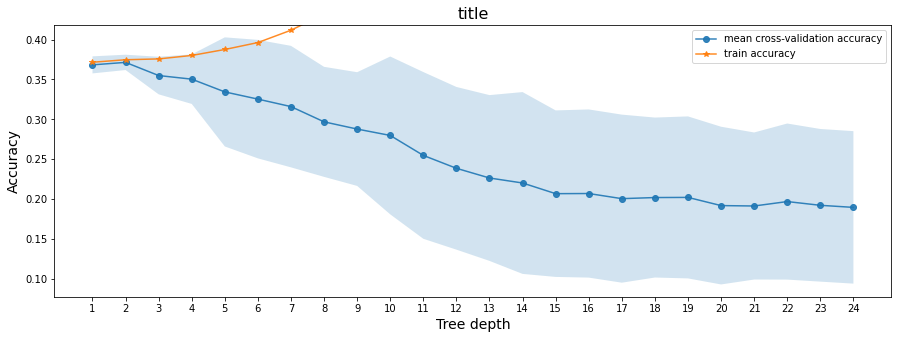

In [17]:
struct_data = Date.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[_np.number]).columns)
le = LabelEncoder()
for col in non_numeric_columns:
    if col in struct_data.columns:
        i = struct_data.columns.get_loc(col)
        struct_data.iloc[:, i] = struct_data.apply(lambda i: le.fit_transform(i.astype(str)), axis=0,
                                                   result_type='expand')
x = struct_data[
            ['Covid cases', 'age_median',
             'family_size', 'income_household_median', 'education_college_or_above',
             'labor_force_participation']]
y = struct_data['Qty']
tree_depths = range(1,25)
cv_scores_mean, cv_scores_std, accuracy_scores = fdm.run_cross_validation_on_trees(x, y, tree_depths, cv=5)
fdm.plot_cross_validation_on_trees(tree_depths, cv_scores_mean, cv_scores_std, accuracy_scores, 'title')

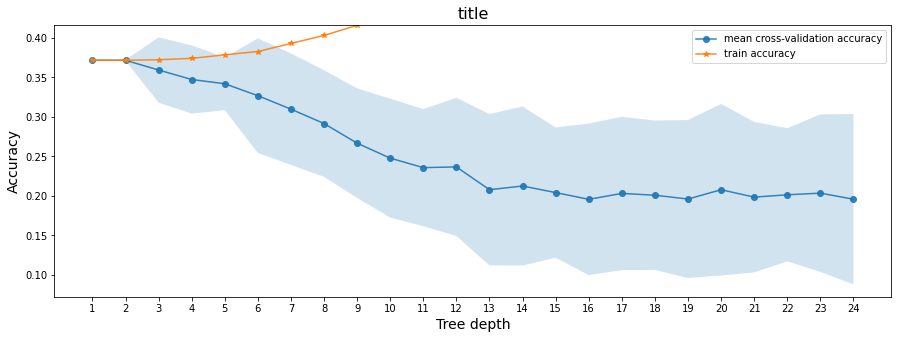

In [18]:
struct_data = Date.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[_np.number]).columns)
le = LabelEncoder()
for col in non_numeric_columns:
    if col in struct_data.columns:
        i = struct_data.columns.get_loc(col)
        struct_data.iloc[:, i] = struct_data.apply(lambda i: le.fit_transform(i.astype(str)), axis=0,
                                                   result_type='expand')
x = struct_data[
            ['age_median',
             'family_size', 'income_household_median', 'education_college_or_above',
             'labor_force_participation']]
y = struct_data['Qty']
tree_depths = range(1,25)
cv_scores_mean, cv_scores_std, accuracy_scores = fdm.run_cross_validation_on_trees(x, y, tree_depths, cv=5)
fdm.plot_cross_validation_on_trees(tree_depths, cv_scores_mean, cv_scores_std, accuracy_scores, 'title')

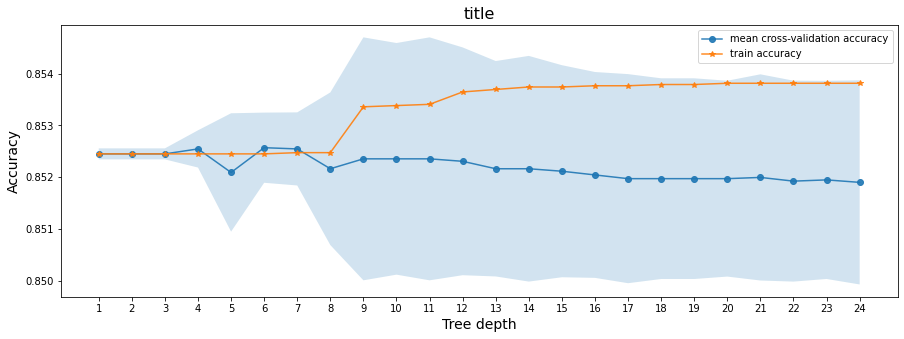

In [19]:
struct_data = State.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[_np.number]).columns)
le = LabelEncoder()
for col in non_numeric_columns:
    if col in struct_data.columns:
        i = struct_data.columns.get_loc(col)
        struct_data.iloc[:, i] = struct_data.apply(lambda i: le.fit_transform(i.astype(str)), axis=0,
                                                   result_type='expand')
x = struct_data[
            ['age_median',
             'family_size', 'income_household_median', 'education_college_or_above',
             'labor_force_participation']]
y = struct_data['Qty']
tree_depths = range(1,25)
cv_scores_mean, cv_scores_std, accuracy_scores = fdm.run_cross_validation_on_trees(x, y, tree_depths, cv=5)
fdm.plot_cross_validation_on_trees(tree_depths, cv_scores_mean, cv_scores_std, accuracy_scores, 'title')

In [20]:
State.columns

Index(['Sub Brand', 'Bill Date', 'Qty', 'Brand', 'State', 'County',
       'Geographical Classification', 'R_Res', 'B_Res', 'S_Res', 'G_Res',
       'NE_Res', 'SAH', 'EM', 'FM', 'Q_Res', 'Covid cases', 'Zip Eliminated',
       'age_median', 'family_size', 'income_household_median',
       'education_college_or_above', 'labor_force_participation',
       'unemployment_rate', 'race_white', 'race_black', 'race_asian',
       'race_native', 'race_pacific', 'race_other', 'race_multiple', 'Year',
       'Series ', 'Brand.1', 'CCG ', 'LDW', 'Months'],
      dtype='object')

In [23]:
Date = State.groupby(['County','Bill Date']).agg({'R_Res':'first', 'B_Res':'first', 'S_Res':'first', 'G_Res':'first',
                                                'NE_Res':'first', 'SAH':'first', 'EM':'first', 'FM':'first', 'Q_Res':'first',
                                               'age_median':'first', 'family_size':'first', 'income_household_median':'first',
                                                'education_college_or_above':'first', 'labor_force_participation':'first',
                                                'Qty':'sum'
                                               }).reset_index()

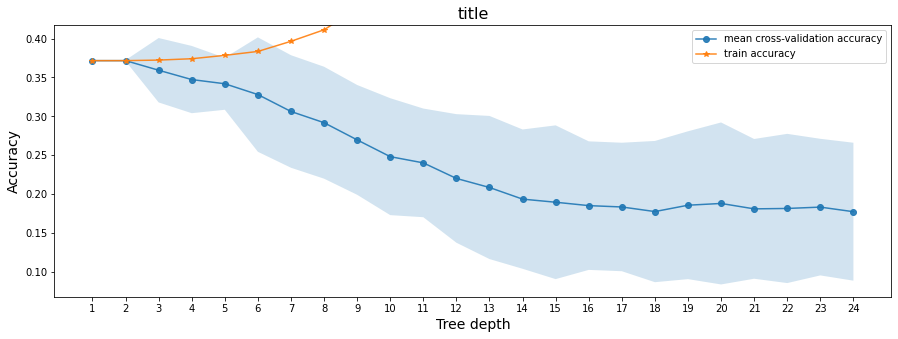

In [24]:
struct_data = Date.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[_np.number]).columns)
le = LabelEncoder()
for col in non_numeric_columns:
    if col in struct_data.columns:
        i = struct_data.columns.get_loc(col)
        struct_data.iloc[:, i] = struct_data.apply(lambda i: le.fit_transform(i.astype(str)), axis=0,
                                                   result_type='expand')
x = struct_data[
            ['R_Res', 'B_Res', 'S_Res', 'G_Res',
               'NE_Res', 'SAH', 'EM', 'FM', 'Q_Res','age_median',
             'family_size', 'income_household_median', 'education_college_or_above',
             'labor_force_participation']]
y = struct_data['Qty']
tree_depths = range(1,25)
cv_scores_mean, cv_scores_std, accuracy_scores = fdm.run_cross_validation_on_trees(x, y, tree_depths, cv=5)
fdm.plot_cross_validation_on_trees(tree_depths, cv_scores_mean, cv_scores_std, accuracy_scores, 'title')